## 1 Multinomial logistic regression and cross validation

### (a) Multinomial logistic regression

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sb

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('strongdrink.txt')
data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
import statsmodels.api as sm
y = data['cultivar']
X = data[['alco', 'malic', 'tot_phen', 'color_int']]
X_train, X_test_1a, y_train, y_test_1a = train_test_split(X, y, test_size = .25,
                                                    random_state=20)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
res1a = MultLogReg.fit(X_train, y_train)
y_pred_1a = MultLogReg.predict(X_test_1a)
print(res1a.intercept_)
print(res1a.coef_)

[-24.01098945  22.8024462    1.20854325]
[[ 1.70040338 -0.26560523  1.22389373  0.02275637]
 [-1.46804432 -0.33305312  0.66401185 -0.92271223]
 [-0.23235907  0.59865838 -1.88790558  0.89995595]]


In [5]:
print('For j = 1, the coefficient is', res1a.coef_[0], ', the intercept is', res1a.intercept_[0])
print('For j = 2, the coefficient is', res1a.coef_[1], ', the intercept is', res1a.intercept_[1])

For j = 1, the coefficient is [ 1.70040338 -0.26560523  1.22389373  0.02275637] , the intercept is -24.0109894515
For j = 2, the coefficient is [-1.46804432 -0.33305312  0.66401185 -0.92271223] , the intercept is 22.8024461982


In [6]:
confusion_matrix(y_test_1a, y_pred_1a)

array([[13,  0,  0],
       [ 2, 19,  0],
       [ 0,  0, 10]])

In [7]:
print(classification_report(y_test_1a, y_pred_1a))
print(data.cultivar.value_counts())

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

2    71
1    59
3    46
Name: cultivar, dtype: int64


The error rate for each category is 0.13, 0, 0. The predictive results in class 3 is better than class 2, and class 2 is better than class 1. In our example, the most accurately predicated category is not the one with most observations.

### (b) LOOCV of the Model

In [8]:
from sklearn.model_selection import LeaveOneOut, KFold
Xvars = data.ix[:, (1, 2, 6, 10)].values
yvals = data.ix[:, 0].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)


for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec[test_index] = (y_test != y_pred)
    y_pred_vec[test_index] = y_pred
    y_test_vec[test_index] = y_test
print(classification_report(y_test_vec, y_pred_vec))
print('test estimate MSE loocv=', MSE_vec.mean(),
      ', test estimate MSE standard err=', MSE_vec.std())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176

test estimate MSE loocv= 0.0795454545455 , test estimate MSE standard err= 0.270588202268


#### The error rates for each category are 0.10, 0.09, and 0.04. It's worse than the results of (a)

### (c) K-fold cross validation

In [9]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)


k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    print(classification_report(y_test, y_pred))
    k_ind += 1

k index= 0
MSE for test set 0  is 0.159090909091
             precision    recall  f1-score   support

          1       0.71      1.00      0.83        12
          2       1.00      0.75      0.86        24
          3       0.78      0.88      0.82         8

avg / total       0.88      0.84      0.84        44

k index= 1
MSE for test set 1  is 0.113636363636
             precision    recall  f1-score   support

          1       1.00      0.76      0.87        17
          2       0.69      1.00      0.81        11
          3       1.00      0.94      0.97        16

avg / total       0.92      0.89      0.89        44

k index= 2
MSE for test set 2  is 0.0454545454545
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        15
          2       0.94      0.94      0.94        16
          3       1.00      0.92      0.96        13

avg / total       0.96      0.95      0.95        44

k index= 3
MSE for test set 3  is 0.045454545454

In [10]:
print('the average error rate for class 1 is ', 1- (0.71 + 1.00 + 0.94 + 0.88)/4)
print('the average error rate for class 2 is ', 1- (1.00 + 0.69 + 0.94 + 1.00)/4)
print('the average error rate for class 3 is ', 1- (0.78 + 1.00 + 1.00 + 1.00)/4)

the average error rate for class 1 is  0.11750000000000005
the average error rate for class 2 is  0.09250000000000003
the average error rate for class 3 is  0.05499999999999994


### The average errror rates are 0.11, 0.09, 0.05, this results is very similar to LOOCV results, but worse than simple multinomial logistic regression.

In [11]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.0909090909091 test estimate MSE standard err= 0.04821182599


## 2 Splines and inerpolation

### (a) Scatterplot of Coolness Index

In [12]:
cool_data = pd.read_csv('CoolIndex.txt', header=None)
cool_data.columns = ['age', 'cool']
cool_data.head()

,age,cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


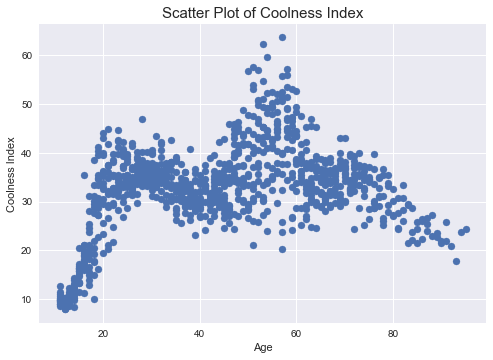

In [13]:
plt.scatter(x =cool_data['age'], y =cool_data['cool'])
plt.title('Scatter Plot of Coolness Index', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.show()

### (b) OLS and Stepwise Function Approximation


In [14]:
cool = cool_data['cool']
age = cool_data['age']
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age < 95) ).astype(int)
X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.describe()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.162134,0.276151,0.285565,0.217573,0.057531
std,0.368767,0.447326,0.451919,0.412812,0.232977
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
reg2 = sm.OLS(endog=cool, exog=X_step, missing='drop')
reg2_results = reg2.fit()
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cool   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4280.
Date:                Sun, 18 Feb 2018   Prob (F-statistic):               0.00
Time:                        21:25:00   Log-Likelihood:                -3220.5
No. Observations:                 956   AIC:                             6451.
Df Residuals:                     951   BIC:                             6475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.566     35.522      0.0

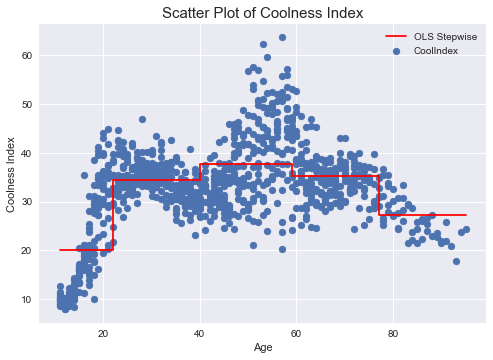

In [16]:
x = [11, 22, 40, 59, 77, 95]
y = reg2_results.params.tolist() + [reg2_results.params[-1]]
ax = plt.axes()
plt.scatter(x =cool_data['age'], y =cool_data['cool'], label='CoolIndex')
ax.set_title('Scatter Plot of Coolness Index', fontsize=15)
ax.set_xlabel('Age')
ax.set_ylabel('Coolness Index')
ax.plot()

ax.step(x, y, where = 'post', color="r", label = 'OLS Stepwise')
plt.legend()
plt.show()

#### We could directly judge from the graph, people are 73 years old has coolness index of 35.2254

### (c)  Linear Spline

In [17]:
from scipy.interpolate import LSQUnivariateSpline
knots = [22, 40, 59, 77]
spl_cool_1 = LSQUnivariateSpline(age.values, cool.values, knots, k=1)
spl_cool_3 = LSQUnivariateSpline(age.values, cool.values, knots, k=3)
age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

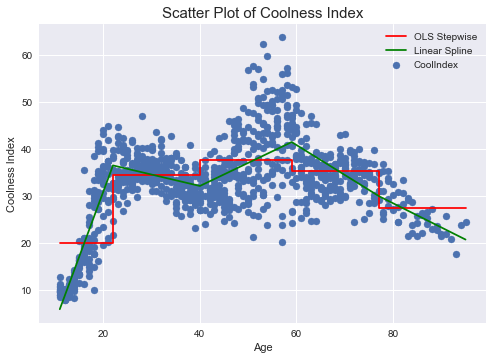

In [18]:
x = [11, 22, 40, 59, 77, 95]
y = reg2_results.params.tolist() + [reg2_results.params[-1]]
ax = plt.axes()
plt.scatter(x =cool_data['age'], y =cool_data['cool'], label='CoolIndex')
ax.set_title('Scatter Plot of Coolness Index', fontsize=15)
ax.set_xlabel('Age')
ax.set_ylabel('Coolness Index')
ax.plot(color='blue')

ax.step(x, y, where = 'post', color="r", label = 'OLS Stepwise')
plt.plot(age_vec, spl_cool_1(age_vec), 'g-', label='Linear Spline')
plt.legend()
plt.show()

In [19]:
ages_for_predict = 73
linear_predicted_wages = spl_cool_1(ages_for_predict)
print('Linear Predicted Coolness for 73 year old is', linear_predicted_wages)

Linear Predicted Coolness for 73 year old is 32.536832389143306


### (d) Cubine Spline

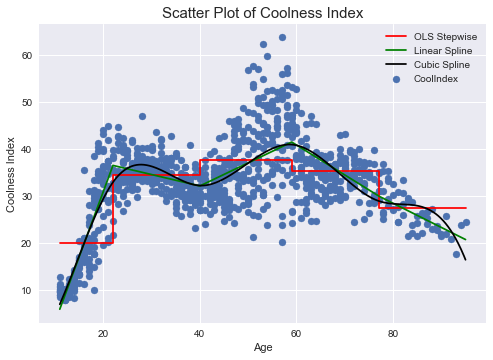

In [20]:
x = [11, 22, 40, 59, 77, 95]
y = reg2_results.params.tolist() + [reg2_results.params[-1]]
ax = plt.axes()
plt.scatter(x =cool_data['age'], y =cool_data['cool'], label='CoolIndex')
ax.set_title('Scatter Plot of Coolness Index', fontsize=15)
ax.set_xlabel('Age')
ax.set_ylabel('Coolness Index')
ax.plot(color='blue')

ax.step(x, y, where = 'post', color="r", label = 'OLS Stepwise')
plt.plot(age_vec, spl_cool_1(age_vec), 'g-', label='Linear Spline')
plt.plot(age_vec, spl_cool_3(age_vec), 'black', label='Cubic Spline')
plt.legend()
plt.show()

In [21]:
ages_for_predict = 73
cubic_predicted_wages = spl_cool_3(ages_for_predict)
print('Cubic Predicted Coolness for 73 year old is', cubic_predicted_wages)

Cubic Predicted Coolness for 73 year old is 31.262429389257864
